In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [2]:
df = pd.read_csv('merged_origin.csv')

In [3]:
df.set_index(pd.to_datetime(df['TIMESTAMP']), inplace=True)

In [6]:
nobs = 10
df_train = df[:-nobs]
df_test = df[-nobs:]

## ADF test-stationary

In [35]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)
    
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')
    
    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(" => P-Value = {:.4f}. Rejecting Null Hypothesis.".format(p_value))
        print(" => Series is Stationary.")
    else:
        print(" => P-Value = {:.4f}. Weak evidence to reject the Null Hypothesis.".format(p_value))
        print(" => Series is Non-Stationary.")   

In [36]:
adfuller_test(df['CLOSE'])

    Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 0.9815
 No. Lags Chosen       = 32
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.9941. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


In [37]:
adfuller_test(df['WETH/PEPE'])

    Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 0.9488
 No. Lags Chosen       = 32
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.9937. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


In [38]:
df_close_diff = df['CLOSE'].diff().dropna()
df_weth_diff = df['WETH/PEPE'].diff().dropna()

In [39]:
adfuller_test(df_close_diff)

    Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -17.6385
 No. Lags Chosen       = 31
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0000. Rejecting Null Hypothesis.
 => Series is Stationary.


In [40]:
adfuller_test(df_weth_diff)

    Augmented Dickey-Fuller Test on "" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -17.566
 No. Lags Chosen       = 31
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0000. Rejecting Null Hypothesis.
 => Series is Stationary.


## DW test

In [13]:
df_train_diff = df_train[['CLOSE', 'WETH/PEPE']].diff().dropna()

In [14]:
model = VAR(df_train_diff)
for i in range(1,11):
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -105.91869020137422
BIC :  -105.91336820050887
FPE :  1.0002241015330982e-46
HQIC:  -105.91686692219736 

Lag Order = 2
AIC :  -106.05243784471513
BIC :  -106.04356687621966
FPE :  8.750068477586395e-47
HQIC:  -106.04939869540314 

Lag Order = 3
AIC :  -106.10932428639363
BIC :  -106.09690357630966
FPE :  8.266201438101183e-47
HQIC:  -106.10506898628155 

Lag Order = 4
AIC :  -106.16174126995993
BIC :  -106.14577004405817
FPE :  7.844072121459328e-47
HQIC:  -106.15626953828175 

Lag Order = 5
AIC :  -106.19527942681795
BIC :  -106.17575691059812
FPE :  7.585359042698965e-47
HQIC:  -106.1885909827065 

Lag Order = 6
AIC :  -106.21804676164528
BIC :  -106.19497218033602
FPE :  7.414611757323734e-47
HQIC:  -106.21014132413228 

Lag Order = 7
AIC :  -106.23459892159093
BIC :  -106.2079715001496
FPE :  7.292894065759435e-47
HQIC:  -106.22547620960685 

Lag Order = 8
AIC :  -106.25071211999071
BIC :  -106.22053108310327
FPE :  7.176323928469032e-47
HQIC:  -106.2403718523

D:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [15]:
model_fitted = model.fit(10)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 12, Aug, 2024
Time:                     18:43:20
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -106.237
Nobs:                     7848.00    HQIC:                  -106.261
Log likelihood:           394790.    FPE:                7.00941e-47
AIC:                     -106.274    Det(Omega_mle):     6.97205e-47
--------------------------------------------------------------------
Results for equation CLOSE
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 0.000000         0.000000            1.730           0.084
L1.CLOSE             -0.026350         0.014822           -1.778           0.075
L1.WETH/PEPE         -0.017879         0.016730           -1

## Granger Causuality Test

In [27]:
def granger_causation_matrix(data, variables, p, test = 'ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the time series.
    The rows are the response variables, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], p, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(p)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In [30]:
granger_causation_matrix(df_train_diff, df_train_diff.columns, 10)  

D:\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
D:\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
D:\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
D:\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


,CLOSE_x,WETH/PEPE_x
CLOSE_y,1.0,0.0
WETH/PEPE_y,0.0,1.0


In [32]:
grangercausalitytests(df_train_diff[['WETH/PEPE','CLOSE']], 10)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1900.1181, p=0.0000  , df_denom=7854, df_num=1
ssr based chi2 test:   chi2=1900.8439, p=0.0000  , df=1
likelihood ratio test: chi2=1702.3496, p=0.0000  , df=1
parameter F test:         F=1900.1181, p=0.0000  , df_denom=7854, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1465.1655, p=0.0000  , df_denom=7851, df_num=2
ssr based chi2 test:   chi2=2932.1972, p=0.0000  , df=2
likelihood ratio test: chi2=2491.7277, p=0.0000  , df=2
parameter F test:         F=1465.1655, p=0.0000  , df_denom=7851, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1104.6088, p=0.0000  , df_denom=7848, df_num=3
ssr based chi2 test:   chi2=3316.7820, p=0.0000  , df=3
likelihood ratio test: chi2=2766.8520, p=0.0000  , df=3
parameter F test:         F=1104.6088, p=0.0000  , df_denom=7848, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=89

{1: ({'ssr_ftest': (1900.118108955824, 0.0, 7854.0, 1),
   'ssr_chi2test': (1900.8438989134083, 0.0, 1),
   'lrtest': (1702.3495534349931, 0.0, 1),
   'params_ftest': (1900.1181108145317, 0.0, 7854.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1465.16550935824, 0.0, 7851.0, 2),
   'ssr_chi2test': (2932.19723386023, 0.0, 2),
   'lrtest': (2491.7277173198527, 0.0, 2),
   'params_ftest': (1465.1654829676263, 0.0, 7851.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1104.6087535518943, 0.0, 7848.0, 3),
   'ssr_chi2test': (3316.7820180237495, 0.0, 3),
   'lrtest': (2766.8519924534485, 0.0, 3),
   'params_ftest': (1104.6087612574595, 0.0, 7848.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])]),
 4: ({'ssr_ftest': (890.9975017080721, 0.0, 7845.0, 4),
   'ssr_chi2test': (3568.0787142971058, 0.0, 4),
   'lrtest': (2941.5213569066254, 0.0, 4),
   'params

In [16]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

In [17]:
out

array([2.00051243, 2.00455061])

In [18]:
lag_order = model_fitted.k_ar
print(lag_order)  #> 7

10


In [19]:
forecast_input = df_train_diff.values[-lag_order:]
forecast_input

array([[ 8.75958385e-14,  6.03000000e-14],
       [ 4.24600560e-12,  7.16800000e-13],
       [ 3.90193187e-12,  7.16140000e-12],
       [ 6.57523671e-13,  6.05000000e-13],
       [ 1.03898523e-11,  1.05291000e-11],
       [ 4.10661309e-12,  3.65200000e-13],
       [ 8.84742535e-12,  7.84000000e-12],
       [ 9.62645985e-12,  2.28187000e-11],
       [ 3.16182002e-12, -5.28000000e-12],
       [-1.23008542e-13, -4.48000000e-14]])

In [20]:
fc = model_fitted.forecast(y=forecast_input, steps=len(df_test))

In [21]:
fc.shape

(10, 2)

In [22]:
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=['CLOSE_2d', 'WETH/PEPE_2d'])

In [23]:
df_forecast

,CLOSE_2d,WETH/PEPE_2d
TIMESTAMP,,
2024-02-28 23:46:00,1.785912e-13,1.220363e-12
2024-02-28 23:49:00,-5.237912e-13,5.542385e-13
2024-02-28 23:50:00,-1.139061e-12,-6.502276e-13
2024-02-28 23:51:00,6.167291e-13,-1.455717e-13
2024-02-28 23:52:00,7.071445e-13,9.499023e-13
2024-02-28 23:55:00,9.032147e-13,2.019836e-13
2024-02-28 23:56:00,5.113431e-13,1.044075e-12
2024-02-28 23:57:00,-1.380029e-14,8.393717e-13
2024-02-28 23:58:00,-1.112981e-13,-6.745356e-13


In [24]:
def inverse_trans(data_train, data_forecast, second_diff=False):
    data_fc = data_forecast.copy()
    for col in ['CLOSE', 'WETH/PEPE']:
        if second_diff:
            data_fc[str(col)+'_1d'] = (data_train[col].iloc[-1] - data_train[col].iloc[-2]) + data_fc[str(col)+'_2d'].cumsum()
        data_fc[str(col)+'_forecast'] = data_train[col].iloc[-1] + data_fc[str(col)+'_1d'].cumsum()
    return data_fc

In [25]:
df_res = inverse_trans(df_train, df_forecast, second_diff = True)
df_res

,CLOSE_2d,WETH/PEPE_2d,CLOSE_1d,CLOSE_forecast,WETH/PEPE_1d,WETH/PEPE_forecast
TIMESTAMP,,,,,,
2024-02-28 23:46:00,1.785912e-13,1.220363e-12,5.558265e-14,9.491516e-10,1.175563e-12,9.473983e-10
2024-02-28 23:49:00,-5.237912e-13,5.542385e-13,-4.682085e-13,9.486834e-10,1.729801e-12,9.491281e-10
2024-02-28 23:50:00,-1.139061e-12,-6.502276e-13,-1.607269e-12,9.470761e-10,1.079574e-12,9.502076e-10
2024-02-28 23:51:00,6.167291e-13,-1.455717e-13,-9.905401e-13,9.460856e-10,9.340019e-13,9.511416e-10
2024-02-28 23:52:00,7.071445e-13,9.499023e-13,-2.833956e-13,9.458022e-10,1.883904e-12,9.530255e-10
2024-02-28 23:55:00,9.032147e-13,2.019836e-13,6.198191e-13,9.464220e-10,2.085888e-12,9.551114e-10
2024-02-28 23:56:00,5.113431e-13,1.044075e-12,1.131162e-12,9.475532e-10,3.129963e-12,9.582414e-10
2024-02-28 23:57:00,-1.380029e-14,8.393717e-13,1.117362e-12,9.486705e-10,3.969334e-12,9.622107e-10
2024-02-28 23:58:00,-1.112981e-13,-6.745356e-13,1.006064e-12,9.496766e-10,3.294799e-12,9.655055e-10


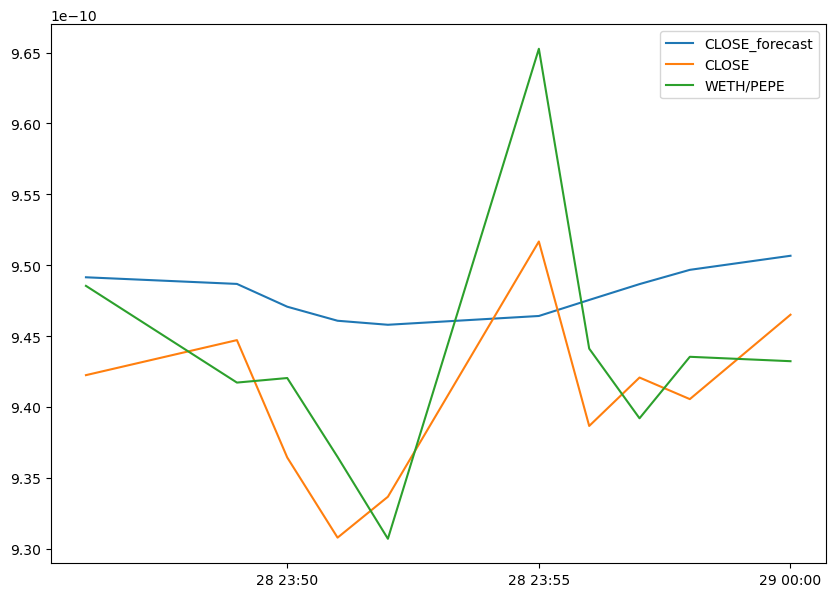

In [26]:
plt.figure(figsize = (10,7))
plt.plot(df_res['CLOSE_forecast'], label='CLOSE_forecast')
plt.plot(df_test['CLOSE'], label='CLOSE')
plt.plot(df_test['WETH/PEPE'], label='WETH/PEPE')
plt.legend()
plt.show()

## Conclusion
Bad Performance.